# Dual Radix

In [2]:
import math
from matplotlib.pyplot import plot

First of all, let's generate a set taking all the powers of 5 from -k to k times all the powers of 5 from 1 - k to k - 1.

We define this set declaring a class 'Unums' to maintain the key points as fields; this will be useful in the algorithm 'to_unum'.

The class 'Unums' has the following fields:

- elements: the set is built as a set but is maintained as an ordered list
- min_pos: minimum amount of variation we can have from one value to another
- max_pos: max value that we can get
- zero_pos: the position of 0 in the list
- one_pos: the position of 1 in the list
- infinite_pos: the position of infinite in the list
- round_decimal: the decimal figure to which a value should be rounded, in order to avoid approximation problems due to programming language

In [3]:
class Unums:

    def __init__(self):
        self.build_full_set()
        self.zero_pos = self.elements.index(0)
        self.one_pos = self.elements.index(1)
        self.infinite_pos = self.length-1
        self.round_decimal = math.ceil(-math.log(self.minpos, 10))
        print(f"Position of zero: {self.zero_pos}")
        print(f"\n{self.elements}\n\nLength: {self.length}")

    def build_full_set(self, k = 4):
        unums = set()
        
        for i in range(-k, k + 1):
            for j in range(1- k, k):
                unums.add(2**i * 5**j)
        unums = sorted(list(unums))
        self.minpos = unums[0]
        self.maxpos = unums[-1]

        unums = [element for element in unums if element >= 1]
        unums = set(unums)

        reciprocals = set(map(lambda x: 1/x, unums))
        unums = unums.union(reciprocals)
        negatives = set(map(lambda x: -x, unums))
        unums = unums.union(negatives)

        unums = unums.union({0, float('inf')})

        self.elements = list(sorted(unums))
        self.length = len(self.elements)


The class 'DualRadix' maintains the unums data structure as a field to apply two algorithms:

- to_unum(): this method takes as input a float and returns the position of the nearest element in the unums
- approx(): this method takes a float and returns its approximation using k unums. The k value is a parameter.

In [4]:
class DualRadix:
    
    def __init__(self):
        self.unums = Unums()

    def to_unum(self, x):
        if (x == float('inf')): return self.unums.infinite_pos
        elif (x >= self.unums.maxpos): return self.unums.infinite_pos - 1
        elif (x <= -self.unums.maxpos): return 0
        elif (x == 0): return self.unums.zero_pos
        elif (0 < x <= self.unums.minpos): return self.unums.zero_pos + 1
        elif (-self.unums.minpos <= x < 0): return self.unums.zero_pos - 1
        else: k = round(math.log(abs(x), 2) * 64/23 + 96)
        if (x < 0): k = 127 - k
        klo = k
        while(self.unums.elements[klo] > x): klo = klo - 1
        khi = k
        while(self.unums.elements[khi] < x): khi = khi + 1
        if(abs(math.log(x/self.unums.elements[klo])) < abs(math.log(self.unums.elements[khi]/x))):
            k = klo
        else:
            k = khi
        return k

    def approx(self, x, k, print_unums=False):
        unums = []
        q = x
        for _ in range(1, k + 1):
            if abs(q) < self.unums.minpos: break
            k = self.to_unum(q)
            u = self.unums.elements[k]
            unums.append(u)
            q = round(q - u, self.unums.round_decimal)        
        if(print_unums): print(unums)
        return round(sum(unums), self.unums.round_decimal)


Once defined the data structures, let's generate the set and plot how the values in the range \[-30 30\] are approximated.

Position of zero: 63

[-2000, -1000, -500, -400, -250, -200, -125, -100, -80, -62.5, -50, -40, -31.25, -25, -20, -16, -15.625, -12.5, -10, -8, -7.8125, -6.25, -5, -4, -3.2, -3.125, -2.5, -2, -1.6, -1.5625, -1.25, -1, -0.8, -0.64, -0.625, -0.5, -0.4, -0.32, -0.3125, -0.25, -0.2, -0.16, -0.128, -0.125, -0.1, -0.08, -0.064, -0.0625, -0.05, -0.04, -0.032, -0.025, -0.02, -0.016, -0.0125, -0.01, -0.008, -0.005, -0.004, -0.0025, -0.002, -0.001, -0.0005, 0, 0.0005, 0.001, 0.002, 0.0025, 0.004, 0.005, 0.008, 0.01, 0.0125, 0.016, 0.02, 0.025, 0.032, 0.04, 0.05, 0.0625, 0.064, 0.08, 0.1, 0.125, 0.128, 0.16, 0.2, 0.25, 0.3125, 0.32, 0.4, 0.5, 0.625, 0.64, 0.8, 1, 1.25, 1.5625, 1.6, 2, 2.5, 3.125, 3.2, 4, 5, 6.25, 7.8125, 8, 10, 12.5, 15.625, 16, 20, 25, 31.25, 40, 50, 62.5, 80, 100, 125, 200, 250, 400, 500, 1000, 2000, inf]

Length: 128
x: [-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 

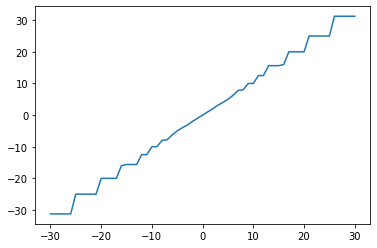

In [5]:
dualRadix = DualRadix()

x = [i for i in range(-30, 31)]
y = [dualRadix.unums.elements[dualRadix.to_unum(i)] for i in range(-30, 31)]

print("x:", x)
print("y:", y)
plot(x, y)

In [6]:
print("Approximation of Square Radix of 3\n")
print("2 unums:", dualRadix.approx(math.sqrt(3), 2, True))
print("3 unums:", dualRadix.approx(math.sqrt(3), 3, True))
print("4 unums:", dualRadix.approx(math.sqrt(3), 4, True))
print("\nApproximation of e\n")
print("2 unums:", dualRadix.approx(math.e, 2, True))
print("3 unums:", dualRadix.approx(math.e, 3, True))
print("4 unums:", dualRadix.approx(math.e, 4, True))

Approximation of Square Radix of 3

[1.6, 0.128]
2 unums: 1.728
[1.6, 0.128, 0.004]
3 unums: 1.732
[1.6, 0.128, 0.004]
4 unums: 1.732

Approximation of e

[2.5, 0.2]
2 unums: 2.7
[2.5, 0.2, 0.016]
3 unums: 2.716
[2.5, 0.2, 0.016, 0.002]
4 unums: 2.718


Let's compare the numbers in the interval \[0, 2\] and their approximation with 5 unums.

In [63]:
table_x = [i/100 for i in range(0, 200)]
table_y = [dualRadix.approx(i/100, 5) for i in range(0, 200)]

for i in range(0, 200):
    print(f"{table_x[i]} - {table_y[i]}")

0.0 - 0
0.01 - 0.01
0.02 - 0.02
0.03 - 0.03
0.04 - 0.04
0.05 - 0.05
0.06 - 0.06
0.07 - 0.07
0.08 - 0.08
0.09 - 0.09
0.1 - 0.1
0.11 - 0.11
0.12 - 0.12
0.13 - 0.13
0.14 - 0.14
0.15 - 0.15
0.16 - 0.16
0.17 - 0.17
0.18 - 0.18
0.19 - 0.19
0.2 - 0.2
0.21 - 0.21
0.22 - 0.22
0.23 - 0.23
0.24 - 0.24
0.25 - 0.25
0.26 - 0.26
0.27 - 0.27
0.28 - 0.28
0.29 - 0.29
0.3 - 0.3
0.31 - 0.31
0.32 - 0.32
0.33 - 0.33
0.34 - 0.34
0.35 - 0.35
0.36 - 0.36
0.37 - 0.37
0.38 - 0.38
0.39 - 0.39
0.4 - 0.4
0.41 - 0.41
0.42 - 0.42
0.43 - 0.43
0.44 - 0.44
0.45 - 0.45
0.46 - 0.46
0.47 - 0.47
0.48 - 0.48
0.49 - 0.49
0.5 - 0.5
0.51 - 0.51
0.52 - 0.52
0.53 - 0.53
0.54 - 0.54
0.55 - 0.55
0.56 - 0.56
0.57 - 0.57
0.58 - 0.58
0.59 - 0.59
0.6 - 0.6
0.61 - 0.61
0.62 - 0.62
0.63 - 0.63
0.64 - 0.64
0.65 - 0.65
0.66 - 0.66
0.67 - 0.67
0.68 - 0.68
0.69 - 0.69
0.7 - 0.7
0.71 - 0.71
0.72 - 0.72
0.73 - 0.73
0.74 - 0.74
0.75 - 0.75
0.76 - 0.76
0.77 - 0.77
0.78 - 0.78
0.79 - 0.79
0.8 - 0.8
0.81 - 0.81
0.82 - 0.82
0.83 - 0.83
0.84 - 0.84


Benchmark: $(\frac{\frac{27}{10} - e}{\pi - (\sqrt{3} + \sqrt{2})})^{\frac{67}{16}} = 302.882$ (WolframAlpha)

In [10]:
k = 4

u_2710 = dualRadix.approx(27/10, k)
u_e = dualRadix.approx(math.e, k)

u_top = dualRadix.approx(u_2710 - u_e, k)

u_r2 = dualRadix.approx(math.sqrt(2), k)
u_r3 = dualRadix.approx(math.sqrt(3), k)
u_sum = dualRadix.approx(u_r2 + u_r3, k)
u_pi = dualRadix.approx(math.pi, k)
u_bot = dualRadix.approx(u_pi - u_sum, k)

u_top_signed = dualRadix.unums.elements[dualRadix.to_unum(u_top)]
u_bot_signed = dualRadix.unums.elements[dualRadix.to_unum(u_bot)]

u_ratio = dualRadix.approx(u_top_signed/u_bot_signed, k)

u_6716 = dualRadix.approx(67/16, k)

result = dualRadix.approx(u_ratio**u_6716, k)

print("27/10 =", u_2710)
print("e =", u_e)
print("top =", u_top)
print("sqrt(2) =", u_r2)
print("sqrt(3) =", u_r3)
print("sqrt(2) + sqrt(3) =", u_sum)
print("Pi =", u_pi)
print("bottom =", u_bot)
print("top approximated =", u_top_signed)
print("bottom approximated =", u_bot_signed)
print("ratio =", u_ratio)
print("exponent =", u_6716)
print("\nFinal Result:", result)

27/10 = 2.7
e = 2.718
top = -0.018
sqrt(2) = 1.4145
sqrt(3) = 1.732
sqrt(2) + sqrt(3) = 3.1465
Pi = 3.1415
bottom = -0.005
top approximated = -0.016
bottom approximated = -0.005
ratio = 3.2
exponent = 4.1875

Final Result: 130.0
